# A Statistical Examination of the Stroop Effect
## Jeffrey Kalmanson
<hr style="border-color: #808080;">
     
## The Stroop Effect

The Stroop effect is a demonstration of cognitive interference in the reaction time of a task. When the name of a color (e.g. "blue") is printed in a color that is not denoted by the name (e.g. the word "red" is printed in blue ink instead of red ink), naming the color of the word takes longer and is more prone to errors than when the color of the ink matches the name of the color. The effect is named after John Ridley Stroop and is one of the most cited papers in experimental psychology.

## Introduction

This project replicates Stroop's experiment with 24 subjects. The participant's task is to say out loud the color of the ink in which the word is printed. The task has two conditions: congruent and incongruent. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally sized lists. Each participant records a time for each condition.

## Statistical Measures

The dependent variable is time in seconds -- the time measured for a subject to complete each test. The independent variable is the type of test administered -- first the congruent test, followed by the incongruent test. We are experimenting with the color of the words and observing the time taken to name the ink color.

In [1]:
import math
import statistics as stats

congruent = [12.079, 16.791, 9.564, 8.63, 14.669, 12.238, 14.692, 8.987, 9.401, 14.48, 22.328, 15.298, 
             15.073, 16.929, 18.2, 12.13, 18.495, 10.639, 11.344, 12.369, 12.944, 14.233, 19.71, 16.004]

incongruent = [19.278, 18.741, 21.214, 15.687, 22.803, 20.878, 24.572, 17.394, 20.762, 26.282, 24.524, 
               18.644, 17.51, 20.33, 35.255, 22.158, 25.139, 20.429, 17.425, 34.288, 23.894, 17.96,
               22.058, 21.157]
#
# Defining my own functions to demonstrate coding ability
#
# stats.median(data)
def median(alist):
    sortlist = quicksort(alist)
    n = len(alist)
    if n%2 == 0:    # list is even length
        i = int(n/2)
        return (sortlist[i] + sortlist[i - 1]) / 2   # average of the two middle elements
    else:
        i = int((n + 1)/2 - 1)
        return sortlist[i]

# stats.mean(data)
def mean(alist):
    sum = 0.0
    n = len(alist)
    for e in alist:
        sum += e
    return sum/n

# stats.stdev(data)
def stddev(alist):
    sum = 0.0
    n = len(alist)
    avrg = mean(alist)
    for e in alist:
        sum += (e - avrg)**2
    return math.sqrt(sum/(n-1))

# numpy.ptp(data)
def range_lo_hi(alist):
    sortlist = quicksort(alist)
    return sortlist[len(sortlist) - 1] - sortlist[0], sortlist[0], sortlist[len(sortlist) - 1]

# sorted(data)
def quicksort(alist):
    left, middle, right = [], [], []
    
    if len(alist) <= 1:   # recursion base case
        return alist
    
    pivot = alist[int(len(alist) / 2)]
    
    for e in alist:
        if e < pivot:
            left.append(e)
            
    for e in alist:
        if e == pivot:
            middle.append(e)
            
    for e in alist:
        if e > pivot:
            right.append(e)
            
    return quicksort(left) + middle + quicksort(right)

mean_congruent = mean(congruent)
mean_incongruent = mean(incongruent)

print ('\n' + "Descriptive Statistics")
print("----------------------" + '\n')
print("Congruent:")
print("n: " + str(len(congruent)))
print("Mean: " + str('{0:.2f}'.format(mean_congruent)))
print("Median: " + str('{0:.2f}'.format(median(congruent))))
print("Standard deviation (sample): " + str('{0:.2f}'.format(stddev(congruent))))
range, lo, hi = range_lo_hi(congruent)
print("Range: " + str('{0:.2f}'.format(range)) + "   Low: " + str('{0:.2f}'.format(lo)) + "   High: " + 
      str('{0:.2f}'.format(hi)))

print('\n' + "Incongruent:")
print("n: " + str(len(incongruent)))
print("Mean: " + str('{0:.2f}'.format(mean_incongruent)))
print("Median: " + str('{0:.2f}'.format(median(incongruent))))
print("Standard deviation (sample): " + str('{0:.2f}'.format(stddev(incongruent))))
range, lo, hi = range_lo_hi(incongruent)
print("Range: " + str('{0:.2f}'.format(range)) + "   Low: " + str('{0:.2f}'.format(lo)) + "   High: " + 
      str('{0:.2f}'.format(hi)) + '\n')


Descriptive Statistics
----------------------

Congruent:
n: 24
Mean: 14.05
Median: 14.36
Standard deviation (sample): 3.56
Range: 13.70   Low: 8.63   High: 22.33

Incongruent:
n: 24
Mean: 22.02
Median: 21.02
Standard deviation (sample): 4.80
Range: 19.57   Low: 15.69   High: 35.26



In [4]:
from plotly import tools
import plotly.plotly as plt
import plotly.graph_objs as go

trace1 = go.Histogram(
    x = congruent, 
    opacity = 0.8, 
    marker = dict(color = '#00CC99'), 
    name = 'Congruent', 
    xbins = dict(start = 5, end = 25, size = 1)
)

trace2 = go.Histogram(
    x = incongruent,  
    opacity = 0.65, 
    name = 'Incongruent', 
    marker = dict(color = '#FF0035'), 
    xbins = dict(start = 15, end = 40, size = 1)
)

fig = tools.make_subplots(rows = 2, cols = 1)   # shared_xaxes = True

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height = 750, width = 900)

fig['layout']['xaxis1'].update(range=[7, 37], autotick = False, tick0 = 0, dtick = 2)  # showticklabels = False
fig['layout']['xaxis2'].update(title='Time in seconds', range=[7, 37], autotick = False, tick0 = 0, dtick = 2)
fig['layout']['yaxis1'].update(title='Frequency', range=[0, 5, 1], )
fig['layout']['yaxis2'].update(title='Frequency', range=[0, 5, 1], )

fig['layout'].update(bargap = 0.1)  # barmode = 'overlay'
fig['layout'].update(title='Data Distribution Comparison')

plt.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



### Histogram
The graph shows a distinct shift of the distribution to longer times for the incongruent test. The data are somewhat normally distributed.

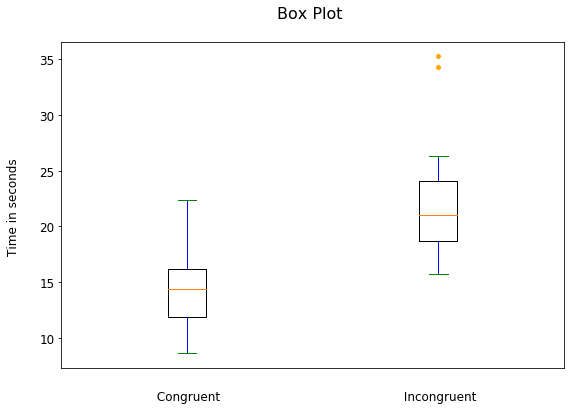

In [4]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

data_to_plot = [congruent, incongruent]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Format the outliers
flierprops = dict(marker='o', markerfacecolor='orange', markeredgecolor='white')

# Create the boxplot
bp = ax.boxplot(data_to_plot, flierprops=flierprops)

# Add color
plt.setp(bp['whiskers'], color='blue')
plt.setp(bp['caps'], color = 'green')

## Custom axes labels
ax.set_xticklabels(['\n Congruent', '\n Incongruent'], fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off'          # ticks along the top edge are off
    )

plt.ylabel('Time in seconds \n', fontsize=12)
plt.title('Box Plot \n', fontsize=16)
print()

plt.show()

### Box Plot
The box plot shows the outliers in the incongruent data.

## Experiment Design

This is a within-subjects design. The advantage of this type of experiment is reduced errors associated with individual differences. Drawbacks of this design are carryover effects and practice effects.

## Statistical Test

A dependent t-test for paired samples is performed. Each subject takes both tests and the times are measured. The test examines whether the difference in times are statistically significant. This means we can say with measured confidence whether the treatment is causing the effect -- the effect is, or is not being caused by chance, and how confident we are in our estimation.      
   
A hypothesis test is used to determine how close a sample mean is to the population mean. In this experiment, we want to determine whether the differences in the test times can be attributed to the incongruency and how confident we are of the result. We can use a hypothesis test to determine how close the mean difference in test times is to a zero difference. The paired t-test allows us to infer the behavior of the population from the samples.

### t-test versus z-test

We use a t-test instead of a z-test because the population standard deviation is not known and the sample size is small (n < 30). The t-test is robust against the assumption of population normality. The tests are often valid even when the assumption of normality is violated, but only if the distribution is not highly skewed for a one-tailed t-test.     

### Dependent Means t-test Assumptions

* Interval or ratio measurement
* Random sampling from a defined population
* Samples used to produce the difference scores are linked with the population through repeated measurement, natural association, or matching
* Scores are normally distributed in the population. Score differences are normally distributed

## Hypothesis Test
A hypothesis test is a statistical test that is used to determine whether there is enough evidence in a sample of data to infer that a certain condition is true for the entire population.    
    
A hypothesis test examines two opposing hypotheses about a population. The null hypothesis is the statement being tested. Usually the null hypothesis is a statement of "no effect" or "no difference". The alternative hypothesis is the statement we want to conclude is true.    

<span style="font-size: 20px">
<i>H</i><sub>0</sub>: <i>μ<sub>incongruent</sub></i>  =  <i>μ<sub>congruent</sub></i></span>     
or `   ` <span style="font-size: 20px"><i>μ<sub>incongruent</sub></i> - <i>μ<sub>congruent</sub></i> = 0</span>    

The null hypothesis, <span style="font-size: 20px"> <i>H</i><sub>0</sub></span> , states there is no difference in times to complete each test     
where ` ` <span style="font-size: 20px"><i>μ</i></span>  is the population mean

<span style="font-size: 20px">
<i>H</i><sub>A</sub>:  <i>μ<sub>incongruent</sub></i>  ≠  <i>μ<sub>congruent</sub></i></span>     
or `   ` <span style="font-size: 20px"><i>μ<sub>incongruent</sub></i> - <i>μ<sub>congruent</sub></i> ≠ 0</span>    

The alternative hypothesis, <span style="font-size: 20px"> <i>H</i><sub>A</sub></span> , states there is a difference in times to complete each test. It does not say longer or shorter times, only the times are different.       

## Inferential Statistics

We take multiple samples from the population, and use those samples in our statistical test to infer characteristics about the population. We are interested in the difference of times between the two treatments across subjects. Therefore, we use the difference between the sample means in our paired two-tailed t-test.   
<br><span style="font-size: 20px"><i>
t-test: x̅<sub>incongruent</sub></i> - <i>x̅<sub>congruent</sub></i></span>     
where `  ` <span style="font-size: 20px"><i>x̅</i></span>  is the sample mean     

The idea is to determine if the mean of the differences across the samples is statistically different from a zero difference. This provides a way of validating or invalidating the population null hypothesis with a given confidence level. Then we can say whether the treatment is causing the difference with a certain surety and the result models the population.

In [2]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from future import standard_library
standard_library.install_aliases()
from future.builtins import (
         bytes, dict, int, list, object, range, str,
         ascii, chr, hex, input, next, oct, open,
         pow, round, super, filter, map, zip)

def difference(alist, blist):
    differ = []
    if len(alist) == len(blist):
        for i in range(0, len(alist)):
            differ.append(alist[i] - blist[i])
    else:
        print("Error: lists not equal length")
        
    return differ

differences = difference(incongruent, congruent)
difference_mean = mean(differences)
difference_stdev = stddev(differences)
n_diff = len(differences)

print ('\n' + "Descriptive Statistics")
print("----------------------" + '\n')
print("Differences:")
print("n: " + str(n_diff))
print("Mean: " + str('{0:.2f}'.format(difference_mean)))
print("Median: " + str('{0:.2f}'.format(median(differences))))
print("Standard deviation (sample): " + str('{0:.2f}'.format(difference_stdev)))
srange, lo, hi = range_lo_hi(differences)
print("Range: " + str('{0:.2f}'.format(srange)) + "   Low: " + str('{0:.2f}'.format(lo)) + "   High: " + 
      str('{0:.2f}'.format(hi)) + '\n')


Descriptive Statistics
----------------------

Differences:
n: 24
Mean: 7.96
Median: 7.67
Standard deviation (sample): 4.86
Range: 19.97   Low: 1.95   High: 21.92



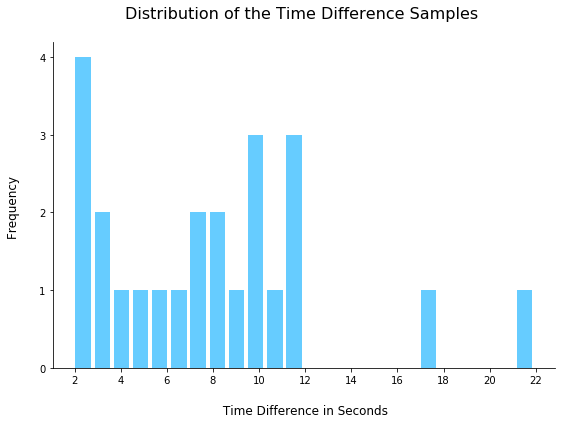

In [11]:
from matplotlib.ticker import MaxNLocator

n_bins = 24

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(12))
ax.hist(differences, n_bins, histtype='bar', color='#66CCFF', label='Difference', rwidth=0.8, align='mid')
ax.set_title('Distribution of the Time Difference Samples \n', fontsize=16)

plt.ylabel('Frequency \n', fontsize=12)
plt.xlabel('\n Time Difference in Seconds', fontsize=12)

#do not display top and right axes
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

print()

#fig.tight_layout()
plt.show()

### Histogram

The time differences are skewed right. However, the two-tailed t-test we are performing is robust against the assumption of normality.

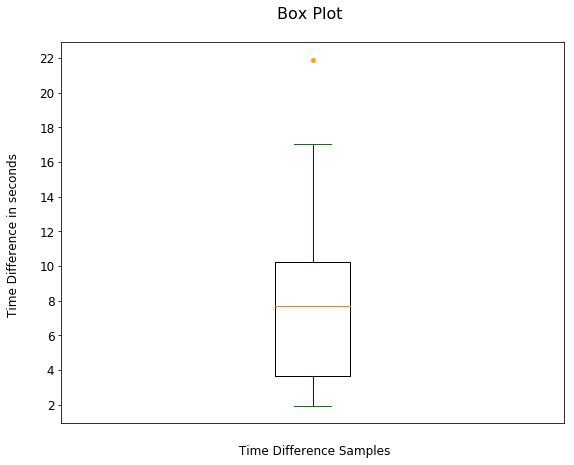

In [15]:
data_to_plot = [differences]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 7))

# Create an axes instance
ax = fig.add_subplot(111)
ax.yaxis.set_major_locator(MaxNLocator(11))

# Format the outliers
flierprops = dict(marker='o', markerfacecolor='orange', markeredgecolor='white')

# Create the boxplot
bp = ax.boxplot(data_to_plot, flierprops=flierprops)

# Add color
plt.setp(bp['whiskers'], color='blue')
plt.setp(bp['caps'], color = 'green')

## Custom axes labels
ax.set_xticklabels(['\n Time Difference Samples'], fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off'          # ticks along the top edge are off
    )

plt.ylabel('Time Difference in seconds \n', fontsize=12)
plt.title('Box Plot \n', fontsize=16)
print()

plt.show()

### Box Plot

The box plot shows an outlier in the time difference samples.     

## t-test

Degrees of freedom: df = 23    
We perform the test at a confidence level <span style="font-size: 50px;">∝</span> = 95%   
At this level <span style="font-size: 18px;"><i> t<sub>critical</sub></i></span> = 2.069   
t(23) = 2.07, p < .05, two-tailed

In [63]:
std_error = difference_stdev / math.sqrt(n_diff)
t_stat = (mean_incongruent - mean_congruent) / std_error
cohens_d = (mean_incongruent - mean_congruent) / difference_stdev
t_critical = 2.069
margin_error = t_critical * std_error
confidence_interval_lo = difference_mean - margin_error
confidence_interval_hi = difference_mean + margin_error
df = n_diff - 1
r_squared = t_stat**2 / (t_stat**2 + df)

print('\n' + "Standard error = " + str('{0:.2f}'.format(std_error)))
print("t statistic = " + str('{0:.2f}'.format(t_stat)))
print("Confidence interval on the mean difference, 95% CI = (" + str('{0:.2f}'.format(confidence_interval_lo)) + 
      ", " + str('{0:.2f}'.format(confidence_interval_hi)) + ")")

print('\n' + "Effect Size Measures")
print("--------------------" + '\n')
print("Cohen's d = " + str('{0:.2f}'.format(cohens_d)))
print("r squared = " + str('{:.2f}'.format(r_squared)))


Standard error = 0.99
t statistic = 8.02
Confidence interval on the mean difference, 95% CI = (5.91, 10.02)

Effect Size Measures
--------------------

Cohen's d = 1.64
r squared = 0.74


The two-tailed p-value is less than 0.0001   
This p-value is substantially less than the test p-value of 0.05   
The result is the difference in times measured is considered to be extremely statistically significant   
We can reject the null hypothesis with 95% confidence   
The sample means are 1.6 standard deviations apart    
We can conclude that the incongruent test slows down response time. In fact, 74% of the time difference effect is due to the incongruent test and a person is expected to be between 6 to 10 seconds slower on the incongruent test

## Conclusion

When the text of a word and its color are congruent, it is easy to recognize the color of the text. However, when the text of the word is incongruent with the color, a conflict arises between the color and the word's meaning. The conflict is between two brain processes, word recognition and color recognition, and requires extra processing time for the brain to resolve. Due to our fluency in language, we process words faster than colors.   
   
In order to name the color correctly, the two processes compete for the final decision making process. The brain has to inhibit the stronger word recognition process in order to allow the color recognition to win in the final response.
This inhibition requires selective attention (attentional focus) to inhibit the competing conflicting process. The reaction time is an indicator of the attentional process in the brain -- it increases with fatigue or inattentiveness.   
   
The Stroop Effect is used to indicate the mental state of attentional fatigue or the decreased ability to inhibit competing conflicts often associated with ADHD (Attention Deficit Hyperactivity Disorder). ADHD subjects often take much longer time than normal subjects to resolve the conflicts and make more errors due to the insufficient inhibition in the brain to suppress the ongoing competing processes.  
   
## Other Tests   
   
To continue investigating the Stroop effect, we could perform an experiment to measure the number of errors made by the subject for each test. We would expect the errors to increase in the incongruent test. We could then compare whether the time taken or the number of errors is the stronger effect.

## References

1. Wikipedia online: Stroop effect - 
https://en.wikipedia.org/wiki/Stroop_effect

2. Stroop test online: Chudler, Eric. University of Washington - 
https://faculty.washington.edu/chudler/java/ready.html

3. Online publication: Tam, Nicoladie. Department of Biological Sciences, University of North Texas - 
http://biology.unt.edu/~tam/index.html   

4. Stroop, J. R. (1935). Studies of interference in serial verbal reactions. Journal of Experimental Psychology,18:643-662.

5. Stroop, J. R. (1938). Factors affecting speed in serial verbal reactions. Psychological Monographs, 50:38-48.